# Regression Models for predicting Valence
# ↳ using NOISE injection data augmentation (n=10)

## Libraries

In [1]:
# for building the models
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# for computing the scores --> https://www.datacourses.com/evaluation-of-regression-models-in-scikit-learn-846/
import math
from sklearn.metrics import mean_squared_error, r2_score

# for result visualization
import numpy as np
import matplotlib.pyplot as plt

# for loading data
import pickle 

## Data loading

In [2]:
# Load train test
f_train_test = open('train_test.pickle', 'rb')
(train,test) = pickle.load(f_train_test)
f_train_test.close()

In [3]:
# Load train samples dfs
f_train_samples = open('train_samples.pickle', 'rb')
(train10, train20, train30, train40, train50, train60, train70, train80, train90) = pickle.load(f_train_samples)
f_train_samples.close()

In [4]:
# Load train augmented samples dfs
f_train_samples_aug = open('train_valence_samples_aug2_2.pickle', 'rb')
(train10_aug,train20_aug,train30_aug,train40_aug,train50_aug,train60_aug,train70_aug,train80_aug,train90_aug,train_aug) = pickle.load(f_train_samples_aug)
f_train_samples_aug.close()

## Prepare data for modeling

In [5]:
train_list = [train10, train20, train30, train40, train50, train60, train70, train80, train90, train]
train_aug_list = [train10_aug,train20_aug,train30_aug,train40_aug,train50_aug,train60_aug,train70_aug,train80_aug,train90_aug,train_aug]

In [6]:
# train data
X_train_list = []
y_train_list = []
for i in range(len(train_list)):
    X_train_list.append(train_list[i][['lyrics']].values.flatten())
    y_train_list.append(train_list[i][['valence']].values)

# augmented data
X_train_aug_list = []
y_train_aug_list = []
for i in range(len(train_aug_list)):
    X_train_aug_list.append(train_aug_list[i][['lyrics']].values.flatten())
    y_train_aug_list.append(train_aug_list[i][['valence']].values)
    
# test data
X_test = test[['lyrics']].values.flatten()
y_test = test[['valence']].values

In [7]:
# range of the train set 
x_range = [item for item in list(range(10,110,10))]

## SGD Regressor

In [8]:
def SGDR_Regressor(X_list,y_list,X_test,y_test):
    SGDR_MSE = []

    for i in tqdm(range(len(train_aug_list))):
        #training de model
        pipe_SGDR = Pipeline([('tfidf_vec' , TfidfVectorizer(min_df=3,
                                                    max_features=5000,
                                                    stop_words='english')),
                     ('clf_SGDR'   , SGDRegressor(random_state=79068588)),
                    ])
        pipe_SGDR.fit(X_list[i],y_list[i].ravel())
        
        #scores
        y_pred=pipe_SGDR.predict(X_test)
        SGDR_MSE.append(mean_squared_error(y_test,y_pred))
        
    return(SGDR_MSE)

In [9]:
sgdr_scores1 = SGDR_Regressor(X_train_list,y_train_list,X_test,y_test)

100%|██████████| 10/10 [00:14<00:00,  1.42s/it]


In [10]:
sgdr_scores2 = SGDR_Regressor(X_train_aug_list,y_train_aug_list,X_test,y_test)

100%|██████████| 10/10 [00:21<00:00,  2.10s/it]


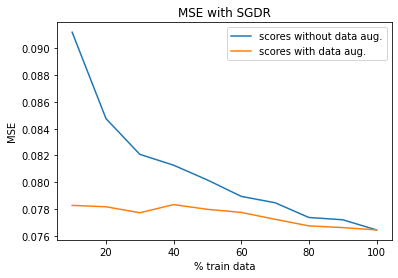

In [11]:
plt.plot(x_range, sgdr_scores1, label='scores without data aug.')
plt.plot(x_range, sgdr_scores2, label='scores with data aug.')
plt.xlabel('% train data')
plt.ylabel('MSE')
plt.title('MSE with SGDR')
plt.legend()
plt.show()

## Decision Tree Regressor

In [12]:
def DT_Regressor(X_list,y_list,X_test,y_test):
    DTR_MSE = []

    for i in tqdm(range(len(train_aug_list))):
        #training de model
        pipe_DTR = Pipeline([('tfidf_vec' , TfidfVectorizer(min_df=3,
                                                    max_features=5000,
                                                    stop_words='english')),
                     ('clf_DTR'   , DecisionTreeRegressor(random_state=79068588)),
                    ])
        pipe_DTR.fit(X_list[i],y_list[i].ravel())
        
        #scores
        y_pred=pipe_DTR.predict(X_test)
        DTR_MSE.append(mean_squared_error(y_test,y_pred))
        
    return(DTR_MSE)

In [13]:
dt_scores1 = DT_Regressor(X_train_list,y_train_list,X_test,y_test)

100%|██████████| 10/10 [01:41<00:00, 10.12s/it]


In [14]:
dt_scores2 = DT_Regressor(X_train_aug_list,y_train_aug_list,X_test,y_test)

100%|██████████| 10/10 [03:00<00:00, 18.06s/it]


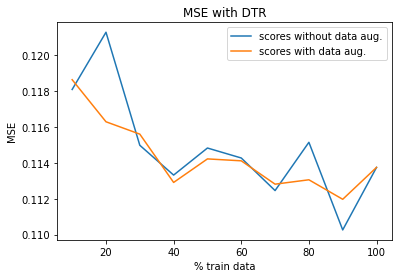

In [15]:
plt.plot(x_range, dt_scores1, label='scores without data aug.')
plt.plot(x_range, dt_scores2, label='scores with data aug.')
plt.xlabel('% train data')
plt.ylabel('MSE')
plt.title('MSE with DTR')
plt.legend()
plt.show()

## Linear SV Regressor

In [16]:
def SVR_Regressor(X_list,y_list,X_test,y_test):
    SVR_MSE = []

    for i in tqdm(range(len(train_aug_list))):
        #training de model
        pipe_SVR = Pipeline([('tfidf_vec' , TfidfVectorizer(min_df=3,
                                                    max_features=5000,
                                                    stop_words='english')),
                     ('clf_SVR'   , LinearSVR(max_iter=10000, random_state=79068588)),
                    ])
        pipe_SVR.fit(X_list[i],y_list[i].ravel())
        
        #scores
        y_pred=pipe_SVR.predict(X_test)
        SVR_MSE.append(mean_squared_error(y_test,y_pred))
        
    return(SVR_MSE)

In [17]:
svr_scores1 = SVR_Regressor(X_train_list,y_train_list,X_test,y_test)

100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


In [18]:
svr_scores2 = SVR_Regressor(X_train_aug_list,y_train_aug_list,X_test,y_test)

  0%|          | 0/10 [00:00<?, ?it/s]/opt/anaconda3/envs/Optimizacion/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
100%|██████████| 10/10 [04:04<00:00, 24.48s/it]


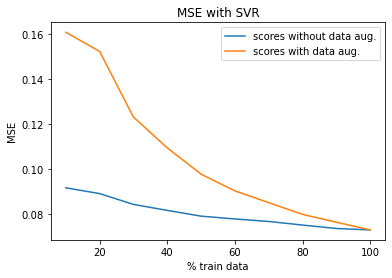

In [19]:
plt.plot(x_range, svr_scores1, label='scores without data aug.')
plt.plot(x_range, svr_scores2, label='scores with data aug.')
plt.xlabel('% train data')
plt.ylabel('MSE')
plt.title('MSE with SVR')
plt.legend()
plt.show()

## Save results

In [20]:
# Save MSE of all models
f_mse_valence_samples_Naug2 = open('mse_valence_samples_Naug2.pickle', 'wb')
pickle.dump([sgdr_scores2,dt_scores2,svr_scores2], f_mse_valence_samples_Naug2)
f_mse_valence_samples_Naug2.close()